In [103]:
import warnings, math, time
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, LeaveOneOut
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_classif, SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.impute import SimpleImputer

from statsmodels.stats.outliers_influence import variance_inflation_factor



In [67]:
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)


df = pd.read_csv('C:/Users/User/Desktop/Trabalhos/APRAU/group_20.csv')
# fix dtype for focus_factor
if "focus_factor" in df.columns and not pd.api.types.is_numeric_dtype(df["focus_factor"]):
    df["focus_factor"] = pd.to_numeric(df["focus_factor"], errors="coerce")

print("Shape:", df.shape)
display(df.head(10))
display(df.dtypes.to_frame("dtype").T)

Shape: (3000, 49)


,duration_1,duration_2,duration_3,duration_4,duration_5,loudness_level,popularity_level,tempo_class,time_signature,key_mode,artist_song_count,album_freq,movement_index,intensity_level,verbal_density,purity_score,positivity_index,activity_rate,loudness_intensity,happy_dance,acoustics_instrumental,artists_avg_popularity,tempo_vs_genre,energy_rank_pct,loud_energy_ratio,mood_pca,mood_cluster,acoustic_valence_mood_cluster,explicit,signal_strength,mode_indicator,focus_factor,ambient_level,key_sin,key_cos,duration_log,duration_log_z,time_signature_class_boolean,loudness_yeo,is_instrumental,is_dance_hit,temp_zscore,resonance_factor,timbre_index,echo_constant,distorted_movement,signal_power,target_class,target_regression
0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,2.0,0.222,-1.512,3.055,0.465,-0.592,-0.216,-0.559,-0.538,0.019,-1.822,0.232,-0.343,-0.291,1.174,-2.050,-1.036,-0.009,-0.526,-0.108,1.385,0.0,0.417,0.0,2.200e-02,0.097,0.000e+00,1.000e+00,1.403,-0.419,1.0,-0.462,0.0,0.0,-1.822,-0.876,0.516,1,-0.517,0.417,class_93,2.634
1,0.0,0.0,1.0,0.0,0.0,3.0,4.0,1.0,0.222,1.330,0.747,-0.089,0.260,1.083,-0.483,-0.798,-0.293,0.064,1.096,-0.235,-0.302,2.233,-0.079,0.618,-0.009,0.171,-0.776,0.396,0.0,0.807,1.0,1.770e-02,0.101,-8.660e-01,5.000e-01,1.611,0.300,1.0,1.548,0.0,0.0,0.064,0.435,0.085,1,0.353,0.807,class_93,2.679
2,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,0.222,-1.484,3.753,-0.430,0.791,0.464,-0.351,-0.699,1.354,0.595,-0.207,1.467,-0.306,-0.124,0.477,0.563,-0.009,1.334,1.562,0.726,0.0,0.797,1.0,7.450e-04,0.055,0.000e+00,1.000e+00,1.246,-0.961,1.0,0.360,0.0,0.0,0.595,-0.194,0.135,1,-0.788,0.797,class_93,2.814
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.222,0.205,-0.407,-0.387,1.229,0.148,0.004,0.421,1.211,0.062,0.465,1.638,-0.306,1.480,-0.081,-0.904,-0.009,0.686,-0.776,-1.252,0.0,0.460,1.0,1.410e-04,0.061,1.225e-16,-1.000e+00,1.757,0.803,1.0,-0.061,0.0,0.0,0.062,0.784,0.265,1,0.197,0.460,class_93,1.648
4,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,0.222,1.583,-0.239,-0.472,0.600,0.262,-0.381,-0.502,0.077,-0.006,-0.179,0.208,-0.306,-1.137,-0.152,-0.056,-0.009,0.226,1.228,1.385,0.0,0.673,0.0,5.290e-05,0.304,-5.000e-01,8.660e-01,1.602,0.269,1.0,0.082,0.0,0.0,-0.006,-1.301,0.630,1,0.174,0.673,class_93,2.321
5,0.0,0.0,1.0,0.0,0.0,3.0,4.0,1.0,0.222,1.049,-0.551,-0.472,0.226,0.757,-0.554,-0.909,0.632,-0.638,0.412,0.487,-0.306,2.292,-0.813,0.572,-0.009,0.756,0.226,0.067,0.0,0.799,1.0,0.000e+00,0.150,-1.000e+00,-1.837e-16,1.586,0.213,1.0,0.841,0.0,0.0,-0.638,0.457,0.804,1,0.036,0.799,class_93,1.962
6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.222,-0.358,0.603,0.678,-0.316,0.380,-0.544,-0.867,-0.475,0.794,-0.042,-0.558,-0.305,1.029,0.685,0.050,-0.009,-0.270,-0.442,0.396,0.0,0.695,1.0,8.150e-03,0.146,8.660e-01,-5.000e-01,1.588,0.221,1.0,0.240,0.0,0.0,0.794,-0.981,0.716,1,-0.005,0.695,class_93,1.514
7,0.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,-2.090,1.330,-0.311,-0.430,-0.840,0.162,-0.548,-0.018,-1.208,0.563,0.691,-1.122,-0.305,-0.672,0.443,-1.066,-0.009,-1.397,1.562,1.714,0.0,0.407,1.0,9.610e-04,0.110,-8.660e-01,5.000e-01,1.750,0.779,1.0,-0.044,0.0,0.0,0.563,-0.647,0.738,1,-0.189,0.407,class_93,2.141
8,0.0,1.0,0.0,0.0,0.0,4.0,4.0,1.0,0.222,1.302,0.290,-0.217,0.358,-0.967,-0.280,1.218,-1.069,-0.459,-1.509,-0.839,-0.295,0.252,-0.626,-0.590,-0.009,-0.811,0.226,-0.922,0.0,0.547,0.0,3.140e-03,0.060,-8.660e-01,5.000e-01,1.789,0.914,1.0,-1.114,0.0,0.0,-0.459,0.580,0.897,1,-0.558,0.547,class_93,2.545
9,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,0.222,-1.484,0.146,-0.387,0.220,0.681,-0.386,-0.927,-0.718,1.529,0.192,-0.585,-0.302,0.324,1.453,0.694,-0.009,-0.086,0.894,0.396,0.0,0.822,1.0,1.340e-01,0.147,0.000e+00,1.000e+00,1.416,-0.374,1.0,0.706,0.0,0.0,1.529,0.047,0.178,1,-0.149,0.822,class_93,2.321


,duration_1,duration_2,duration_3,duration_4,duration_5,loudness_level,popularity_level,tempo_class,time_signature,key_mode,artist_song_count,album_freq,movement_index,intensity_level,verbal_density,purity_score,positivity_index,activity_rate,loudness_intensity,happy_dance,acoustics_instrumental,artists_avg_popularity,tempo_vs_genre,energy_rank_pct,loud_energy_ratio,mood_pca,mood_cluster,acoustic_valence_mood_cluster,explicit,signal_strength,mode_indicator,focus_factor,ambient_level,key_sin,key_cos,duration_log,duration_log_z,time_signature_class_boolean,loudness_yeo,is_instrumental,is_dance_hit,temp_zscore,resonance_factor,timbre_index,echo_constant,distorted_movement,signal_power,target_class,target_regression
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,object,float64


In [72]:
print("Missing values (top 15):")
display(df.isna().sum().sort_values(ascending=False).head(15))

print("\nDuplicates:", int(df.duplicated().sum()))
const_cols = [c for c in df.columns if c not in ["target_class","target_regression"] and df[c].nunique(dropna=False) <= 1]
print("Constant columns:", const_cols)

if "target_class" in df.columns:
    print("\nClass distribution:")
    display(df["target_class"].value_counts())

if "target_regression" in df.columns:
    print("\nRegression target summary:")
    display(df["target_regression"].describe())

num_cols = df.select_dtypes(include="number").columns.tolist()
print(f"Numeric columns found: {len(num_cols)}")



Missing values (top 15):


focus_factor         10
duration_2            0
duration_3            0
duration_4            0
duration_5            0
loudness_level        0
popularity_level      0
tempo_class           0
time_signature        0
key_mode              0
artist_song_count     0
album_freq            0
movement_index        0
intensity_level       0
verbal_density        0
dtype: int64


Duplicates: 0
Constant columns: ['echo_constant']

Class distribution:


target_class
class_93     1000
class_105    1000
class_112    1000
Name: count, dtype: int64


Regression target summary:


count    3000.000
mean       -0.349
std         1.290
min        -1.490
25%        -1.490
50%        -1.356
75%         0.707
max         2.814
Name: target_regression, dtype: float64

Numeric columns found: 48


In [73]:
# --- 2) CLEANING --------------------------------------------------
df_clean = df.copy()

print("Initial shape:", df_clean.shape)

# 1) Type coercion (for example, focus_factor → numeric)
if "focus_factor" in df_clean.columns and not pd.api.types.is_numeric_dtype(df_clean["focus_factor"]):
    df_clean["focus_factor"] = pd.to_numeric(df_clean["focus_factor"], errors="coerce")
    print("Converted column 'focus_factor' to numeric type (non-convertible values → NaN)")

# 2) Replace ±inf with NaN
num_cols = df_clean.select_dtypes(include="number").columns
for c in num_cols:
    if np.isinf(df_clean[c]).any():
        n_inf = np.isinf(df_clean[c]).sum()
        df_clean.loc[np.isinf(df_clean[c]), c] = np.nan
        print(f"Replaced {n_inf} ±inf values in column '{c}' with NaN")

# 3) Drop entirely empty columns (all NaN)
empty_cols = [c for c in df_clean.columns if df_clean[c].isna().all()]
if empty_cols:
    print(f"\nColumns dropped for being completely empty ({len(empty_cols)}):")
    for col in empty_cols:
        print("  •", col)
    df_clean.drop(columns=empty_cols, inplace=True)
else:
    print("\nNo completely empty columns found.")
print("Shape after dropping empty columns:", df_clean.shape)

# 4) Remove duplicate rows
n_dups = df_clean.duplicated().sum()
if n_dups > 0:
    print(f"\nRemoved {n_dups} duplicate rows.")
    df_clean = df_clean.drop_duplicates().reset_index(drop=True)
else:
    print("\nNo duplicate rows found.")
print("Shape after removing duplicates:", df_clean.shape)

# 5) Drop constant columns (same value for all rows)
targets = [c for c in ["target_class","target_regression"] if c in df_clean.columns]
const_cols = [c for c in df_clean.columns if c not in targets and df_clean[c].nunique(dropna=False) <= 1]
if const_cols:
    print(f"\nColumns dropped for having constant values ({len(const_cols)}):")
    for col in const_cols:
        print("  •", col)
    df_clean.drop(columns=const_cols, inplace=True)
else:
    print("\nNo constant columns found.")
print("Shape after dropping constant columns:", df_clean.shape)

# 6) Missing-value summary — only show columns that actually have NaN
missing_summary = df_clean.isna().sum()
missing_cols = missing_summary[missing_summary > 0]
if not missing_cols.empty:
    print("\nColumns containing missing values:")
    for col, n_miss in missing_cols.items():
        print(f"  • {col}: {n_miss} missing")
else:
    print("\nNo missing values found in any column.")

Initial shape: (3000, 49)

No completely empty columns found.
Shape after dropping empty columns: (3000, 49)

No duplicate rows found.
Shape after removing duplicates: (3000, 49)

Columns dropped for having constant values (1):
  • echo_constant
Shape after dropping constant columns: (3000, 48)

Columns containing missing values:
  • focus_factor: 10 missing


In [98]:
# --- 7) Handle missing values (replace NaN with column mean) --------------------
num_cols = df_clean.select_dtypes(include="number").columns

# Count how many numeric columns actually have NaN
cols_with_na = [c for c in num_cols if df_clean[c].isna().any()]

if cols_with_na:
    print(f"\nReplacing NaN values with column mean for {len(cols_with_na)} numeric columns:")
    for c in cols_with_na:
        mean_val = df_clean[c].mean()
        n_missing = df_clean[c].isna().sum()
        df_clean[c].fillna(mean_val, inplace=True)
        print(f"  • {c}: {n_missing} values replaced with mean = {mean_val:.4f}")
else:
    print("\nNo numeric columns contained NaN values — no replacements performed.")

print("Shape after missing value treatment:", df_clean.shape)



Replacing NaN values with column mean for 1 numeric columns:
  • focus_factor: 10 values replaced with mean = 0.1533
Shape after missing value treatment: (3000, 48)


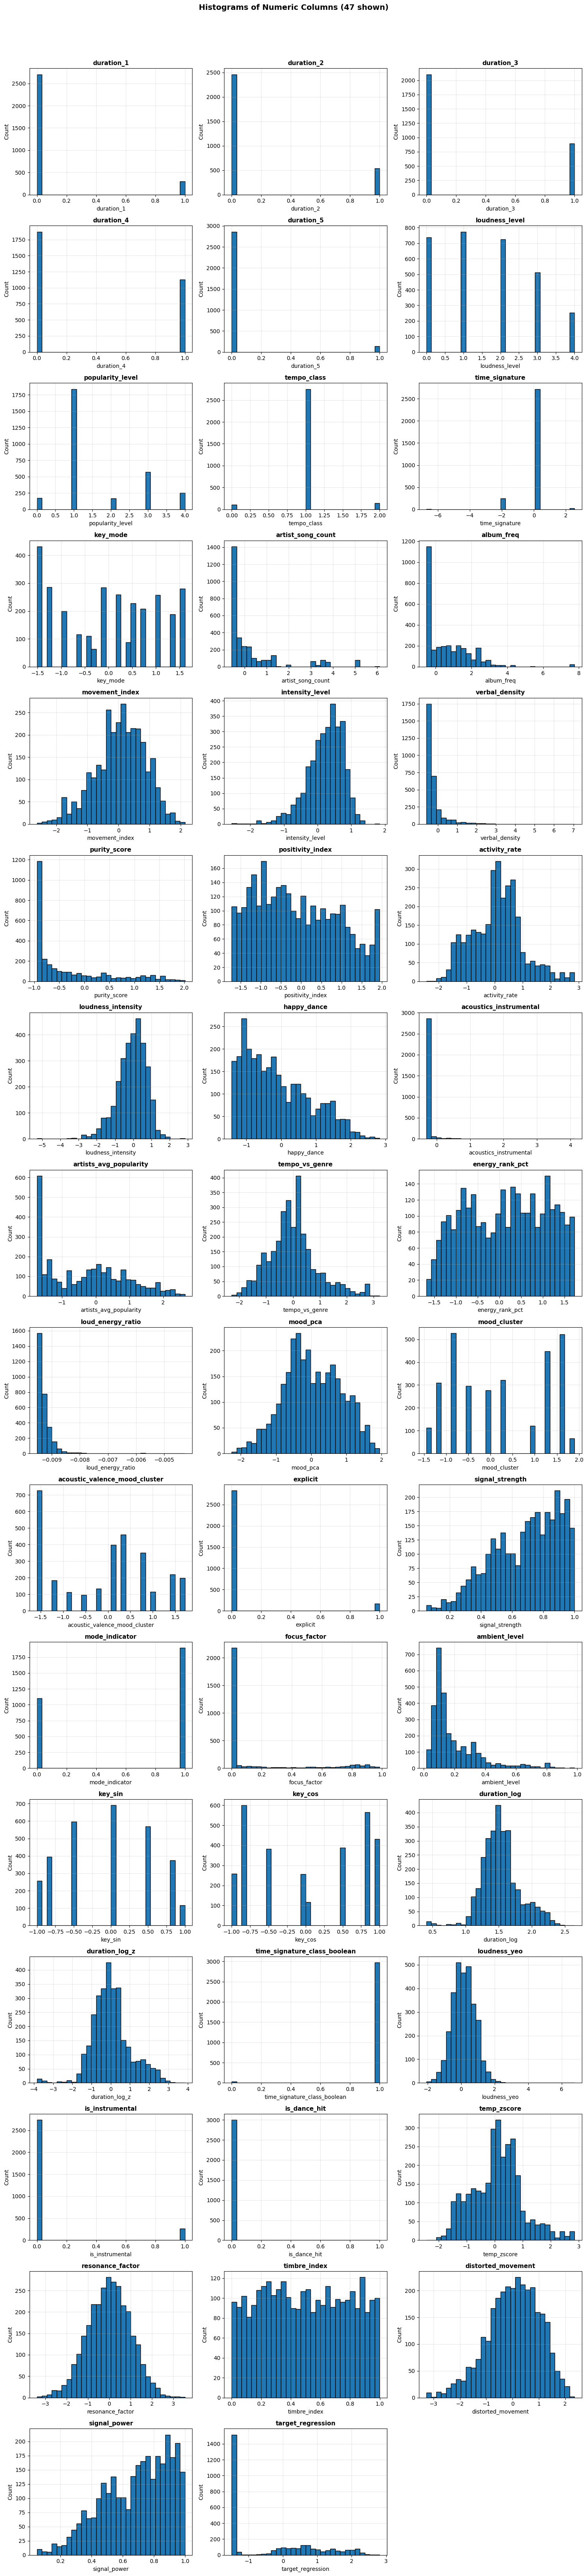

Plotted histograms for 47 columns


In [99]:
MAX_HISTS = None
num_cols = df_clean.select_dtypes(include="number").columns.tolist()

cols_to_plot = num_cols[:MAX_HISTS] if MAX_HISTS else num_cols

cols_per_row = 3
rows = math.ceil(len(cols_to_plot) / cols_per_row)

plt.figure(figsize=(cols_per_row * 5, rows * 4))
for i, c in enumerate(cols_to_plot, 1):
    plt.subplot(rows, cols_per_row, i)
    df[c].hist(bins=30, edgecolor="black")
    plt.title(c, fontsize=11, fontweight="bold")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.suptitle(f"Histograms of Numeric Columns ({len(cols_to_plot)} shown)", fontsize=14, fontweight="bold", y=1.02)
plt.show()

print(f"Plotted histograms for {len(cols_to_plot)} columns")


Top 10 positively correlated features with target_regression:


,Correlation
artists_avg_popularity,0.805
popularity_level,0.641
focus_factor,0.181
duration_log,0.153
duration_log_z,0.153
energy_rank_pct,0.143
signal_power,0.136
signal_strength,0.136
explicit,0.110
is_instrumental,0.102



Top 10 negatively correlated features with target_regression:


,Correlation
loud_energy_ratio,-0.099
acoustic_valence_mood_cluster,-0.109
mood_pca,-0.132
duration_4,-0.139
mode_indicator,-0.172
purity_score,-0.186
happy_dance,-0.200
positivity_index,-0.264
artist_song_count,-0.268
album_freq,-0.623


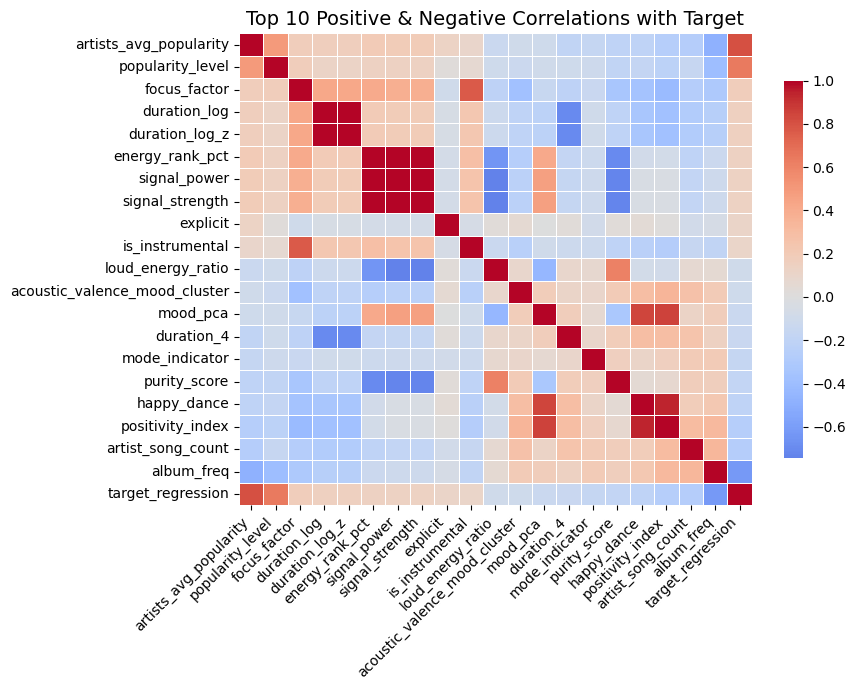

In [100]:
# Get all numeric columns
num_cols = df_clean.select_dtypes(include="number").columns.tolist()

# Exclude target from the feature list
num_cols_no_target = [col for col in num_cols if col != "target_regression"]

# Correlation matrix including target for comparison
corr_matrix = df_clean[num_cols_no_target + ["target_regression"]].corr()

# Extract correlations with target (excluding self-correlation)
corr_target = corr_matrix["target_regression"].drop("target_regression", errors="ignore").sort_values(ascending=False)

# Print results
print("Top 10 positively correlated features with target_regression:")
display(corr_target.head(10).to_frame("Correlation"))

print("\nTop 10 negatively correlated features with target_regression:")
display(corr_target.tail(10).to_frame("Correlation"))

# Plot the heatmap (graphical view only)
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_subset,
    annot=False,              # no numbers inside
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Top 10 Positive & Negative Correlations with Target", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

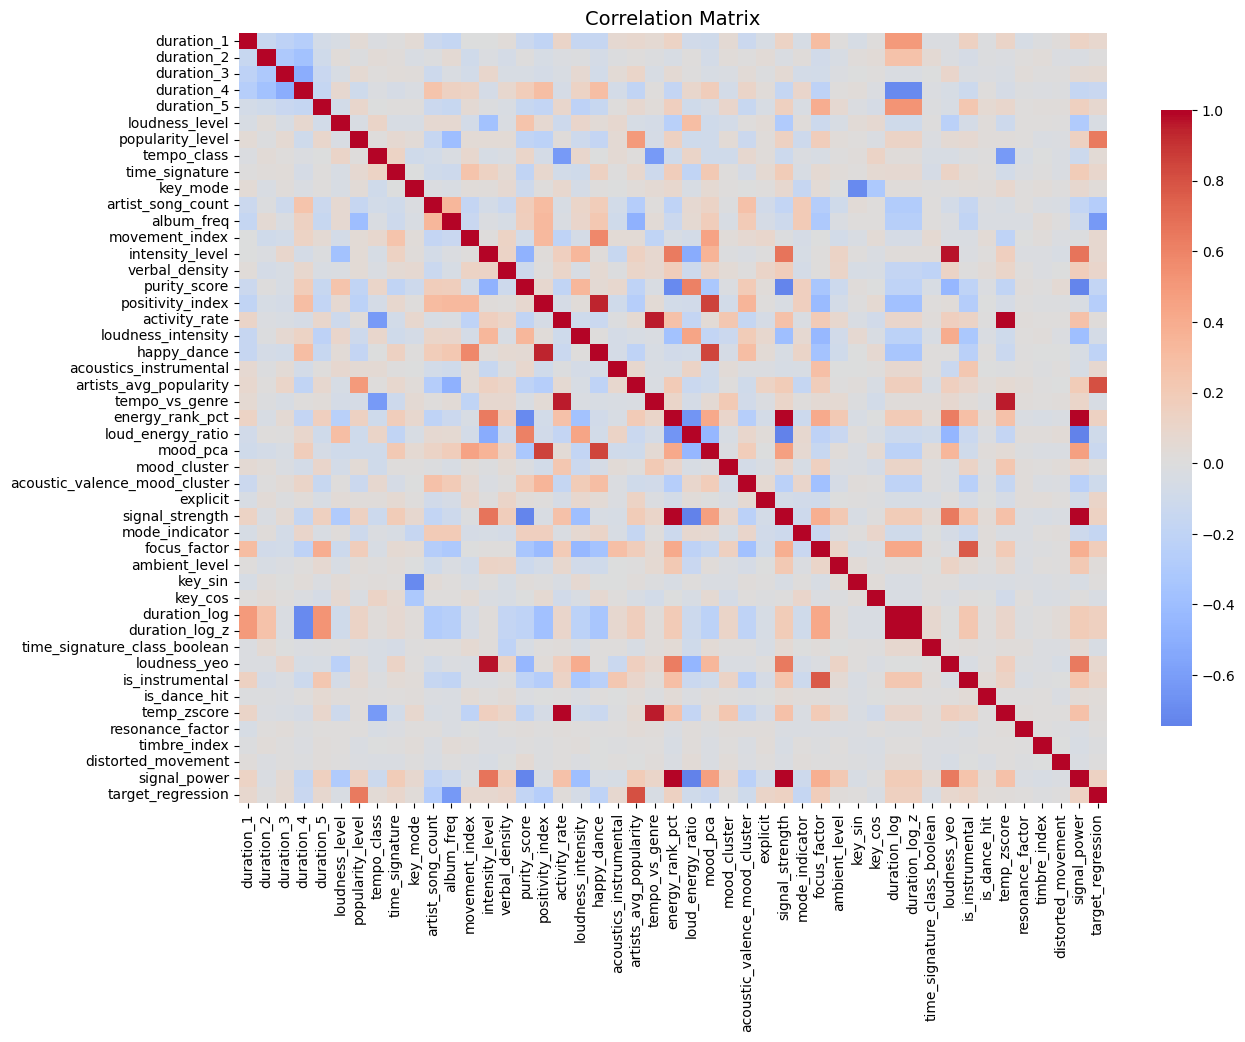

In [89]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix", fontsize=14)
plt.show()


In [101]:
# ANOVA
if "target_class" in df_clean:
    X_anova = df_clean[num_cols].drop(columns=["target_regression"], errors="ignore")
    y_codes = df_clean["target_class"].astype("category").cat.codes
    fvals, pvals = f_classif(X_anova, y_codes)
    anova = pd.DataFrame({"feature": X_anova.columns, "F": fvals, "p": pvals}).sort_values("F", ascending=False)
    display(anova.head(15))


,feature,F,p
31,focus_factor,1079.673,0.000e+00
23,energy_rank_pct,907.456,7.278e-309
29,signal_strength,831.129,6.959e-288
45,signal_power,831.129,6.959e-288
15,purity_score,690.695,2.021e-247
16,positivity_index,407.010,4.215e-157
11,album_freq,391.311,1.020e-151
39,is_instrumental,310.592,2.611e-123
24,loud_energy_ratio,268.380,6.051e-108
27,acoustic_valence_mood_cluster,265.503,6.960e-107


In [104]:
assert "target_regression" in df_clean.columns
num_cols = df_clean.select_dtypes(include="number").columns.tolist()

X_all = df_clean[num_cols].drop(columns=["target_regression"], errors="ignore")
y = df_clean["target_regression"]

X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.25, random_state=42)

# Manual median imputation
imp = SimpleImputer(strategy="median")
X_train_imp = pd.DataFrame(imp.fit_transform(X_train), columns=X_train.columns)
X_test_imp  = pd.DataFrame(imp.transform(X_test), columns=X_test.columns)


In [105]:
slr_results = []
for f in X_train_imp.columns:
    model = LinearRegression().fit(X_train_imp[[f]], y_train)
    preds = model.predict(X_test_imp[[f]])
    slr_results.append([f, r2_score(y_test, preds), mean_absolute_error(y_test, preds), math.sqrt(mean_squared_error(y_test, preds))])

slr_df = pd.DataFrame(slr_results, columns=["Feature","R2","MAE","RMSE"]).sort_values("R2", ascending=False)
display(slr_df.head(10))


,Feature,R2,MAE,RMSE
21,artists_avg_popularity,0.679,0.452,0.714
6,popularity_level,0.406,0.747,0.971
11,album_freq,0.385,0.790,0.988
16,positivity_index,0.087,1.036,1.204
10,artist_song_count,0.060,1.043,1.222
19,happy_dance,0.054,1.079,1.225
30,mode_indicator,0.046,1.112,1.231
15,purity_score,0.043,1.088,1.232
31,focus_factor,0.033,1.094,1.239
25,mood_pca,0.022,1.120,1.246


In [106]:
corr = pd.concat([X_all, y], axis=1).corr()["target_regression"].drop("target_regression").sort_values(ascending=False)

def compute_vif(df):
    Xnp = df.assign(const=1).values
    return pd.Series([variance_inflation_factor(Xnp, i) for i in range(Xnp.shape[1]-1)], index=df.columns)

mlr_rows = []
for k in [5,10,15]:
    topk = corr.head(k).index.tolist()
    subset = X_train_imp[topk].copy()
    while True:
        vif = compute_vif(subset)
        if vif.max() <= 10 or subset.shape[1] <= 2: break
        subset = subset.drop(columns=[vif.idxmax()])
    kept = subset.columns
    model = LinearRegression().fit(X_train_imp[kept], y_train)
    preds = model.predict(X_test_imp[kept])
    mlr_rows.append([k, len(kept), ", ".join(kept),
                     r2_score(y_test,preds), mean_absolute_error(y_test,preds), math.sqrt(mean_squared_error(y_test,preds))])
mlr_df = pd.DataFrame(mlr_rows, columns=["k_start","n_kept","features","R2","MAE","RMSE"])
display(mlr_df)


,k_start,n_kept,features,R2,MAE,RMSE
0,5,4,"artists_avg_popularity, popularity_level, focu...",0.747,0.445,0.634
1,10,7,"artists_avg_popularity, popularity_level, focu...",0.748,0.442,0.632
2,15,11,"artists_avg_popularity, popularity_level, focu...",0.749,0.439,0.631


In [107]:
assert "target_class" in df_clean.columns
X_cls = df_clean.drop(columns=["target_class","target_regression"], errors="ignore")
y_cls = df_clean["target_class"]

# Median imputation + scaling
imp = SimpleImputer(strategy="median")
scaler = StandardScaler()

X_imp = pd.DataFrame(imp.fit_transform(X_cls), columns=X_cls.columns)
X_scaled = pd.DataFrame(scaler.fit_transform(X_imp), columns=X_cls.columns)


In [108]:
models = {"LogReg": LogisticRegression(max_iter=1000, multi_class="multinomial"),
          "LDA": LDA(),
          "QDA": QDA()}

rows = []
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cls, test_size=0.25, random_state=42, stratify=y_cls)

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    elapsed = time.time() - start
    rows.append([name, "Holdout", accuracy_score(y_test, pred), f1_score(y_test, pred, average="macro"), elapsed])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    acc = cross_val_score(model, X_scaled, y_cls, cv=cv, scoring="accuracy").mean()
    f1  = cross_val_score(model, X_scaled, y_cls, cv=cv, scoring="f1_macro").mean()
    rows.append([name, "5-Fold", acc, f1, None])

cls_df = pd.DataFrame(rows, columns=["Model","Protocol","Accuracy","F1_macro","Time"])
display(cls_df)


,Model,Protocol,Accuracy,F1_macro,Time
0,LogReg,Holdout,0.969,0.969,0.017
1,LDA,Holdout,1.000,1.000,0.006
2,QDA,Holdout,0.999,0.999,0.005
3,LogReg,5-Fold,0.979,0.979,NaN
4,LDA,5-Fold,0.999,0.999,NaN
5,QDA,5-Fold,0.994,0.994,NaN


In [109]:
imp = SimpleImputer(strategy="median")
scaler = StandardScaler()

X_fs = pd.DataFrame(imp.fit_transform(X_cls), columns=X_cls.columns)
X_fs = pd.DataFrame(scaler.fit_transform(X_fs), columns=X_fs.columns)

selector = SelectFromModel(LinearSVC(C=0.5, penalty="l1", dual=False, max_iter=5000))
selector.fit(X_fs, y_cls)
selected = X_fs.columns[selector.get_support()].tolist()
print(f"Selected {len(selected)} features:")
display(selected)


Selected 42 features:


['duration_1',
 'duration_2',
 'duration_3',
 'duration_4',
 'duration_5',
 'loudness_level',
 'popularity_level',
 'tempo_class',
 'time_signature',
 'key_mode',
 'artist_song_count',
 'album_freq',
 'movement_index',
 'intensity_level',
 'verbal_density',
 'purity_score',
 'positivity_index',
 'activity_rate',
 'loudness_intensity',
 'happy_dance',
 'acoustics_instrumental',
 'artists_avg_popularity',
 'tempo_vs_genre',
 'energy_rank_pct',
 'loud_energy_ratio',
 'mood_cluster',
 'acoustic_valence_mood_cluster',
 'explicit',
 'mode_indicator',
 'focus_factor',
 'ambient_level',
 'key_sin',
 'key_cos',
 'duration_log',
 'duration_log_z',
 'time_signature_class_boolean',
 'loudness_yeo',
 'is_instrumental',
 'temp_zscore',
 'resonance_factor',
 'timbre_index',
 'distorted_movement']

In [110]:
from IPython.display import Markdown

Markdown(f"""
**Cleaning:** Duplicates, empty and constant columns removed. ±inf replaced by NaN. Median imputation applied manually before modeling.  
**Regression:** Best SLR feature = {slr_df.iloc[0,0]}, R² = {slr_df.iloc[0,1]:.3f}.  
Best MLR (top-k corr + VIF≤10): R² = {mlr_df.iloc[0,3]:.3f}, features kept = {mlr_df.iloc[0,1]}.  
**Classification:** Logistic Regression and LDA tend to perform best; results shown above.  
**Feature Selection:** {len(selected)} features selected by L1 regularization.
""")



**Cleaning:** Duplicates, empty and constant columns removed. ±inf replaced by NaN. Median imputation applied manually before modeling.  
**Regression:** Best SLR feature = artists_avg_popularity, R² = 0.679.  
Best MLR (top-k corr + VIF≤10): R² = 0.747, features kept = 4.  
**Classification:** Logistic Regression and LDA tend to perform best; results shown above.  
**Feature Selection:** 42 features selected by L1 regularization.
